In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')# filter out warnings

In [85]:
df = pd.read_csv("project data.csv")
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2316353.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517121.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221791.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211547.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH..."
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443775.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."


# Checking the duplicate values and dropping them


In [87]:
df.duplicated().sum()

84

In [89]:
df = df.drop_duplicates(keep = "first")
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2316353.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517121.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221791.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211547.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH..."
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443775.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
...,...,...,...,...,...,...,...,...
20143,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"AL, AZ, BA, BG, BY, CY, EE, FR, GF, HU, IT, LT..."
20144,NaN,tv,Drama,2024.0,NaN,NaN,NaN,"AO, CI, CM, CV, GH, GQ, KE, MG, ML, MU, MZ, NE..."
20145,NaN,tv,"Animation, Action & Adventure",2016.0,NaN,NaN,NaN,"FJ, HK, ID, IN, JP, KR, MU, MY, PH, PK, SG, TH..."
20146,NaN,tv,NaN,NaN,NaN,NaN,NaN,"FJ, HK, ID, IN, JP, KR, MU, MY, PH, PK, SG, TH..."


# checking the data type and null values

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20064 entries, 0 to 20147
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19632 non-null  object 
 1   type                20064 non-null  object 
 2   genres              19811 non-null  object 
 3   releaseYear         20049 non-null  float64
 4   imdbId              18868 non-null  object 
 5   imdbAverageRating   18727 non-null  float64
 6   imdbNumVotes        18727 non-null  float64
 7   availableCountries  20064 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.4+ MB


In [91]:
df.isnull().sum()

title                  432
type                     0
genres                 253
releaseYear             15
imdbId                1196
imdbAverageRating     1337
imdbNumVotes          1337
availableCountries       0
dtype: int64

Changing the data type 


In [95]:
df['type'] = df['type'].astype(str)

In [97]:
#filling the missing value with mode and changing the data type
most_common_year = df['releaseYear'].mode()[0]
df.loc[:, 'releaseYear'] = df['releaseYear'].fillna(most_common_year)
df['releaseYear'] = df['releaseYear'].astype(int)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20064 entries, 0 to 20147
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19632 non-null  object 
 1   type                20064 non-null  object 
 2   genres              19811 non-null  object 
 3   releaseYear         20064 non-null  int32  
 4   imdbId              18868 non-null  object 
 5   imdbAverageRating   18727 non-null  float64
 6   imdbNumVotes        18727 non-null  float64
 7   availableCountries  20064 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 1.3+ MB


In [101]:
df['imdbAverageRating'] = df['imdbAverageRating'].fillna(0)
df['imdbNumVotes'] = df['imdbNumVotes'].fillna(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20064 entries, 0 to 20147
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19632 non-null  object 
 1   type                20064 non-null  object 
 2   genres              19811 non-null  object 
 3   releaseYear         20064 non-null  int32  
 4   imdbId              18868 non-null  object 
 5   imdbAverageRating   20064 non-null  float64
 6   imdbNumVotes        20064 non-null  float64
 7   availableCountries  20064 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 1.3+ MB


In [103]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2316353.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,tt0119116,7.6,517121.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,tt0266697,8.2,1221791.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005,tt0418763,7.0,211547.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH..."
4,Unforgiven,movie,"Drama, Western",1992,tt0105695,8.2,443775.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."


In [107]:
df = df.drop('imdbId', axis=1)

In [105]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2316353.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,tt0119116,7.6,517121.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,tt0266697,8.2,1221791.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005,tt0418763,7.0,211547.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH..."
4,Unforgiven,movie,"Drama, Western",1992,tt0105695,8.2,443775.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."


In [111]:
df = df.rename(columns={'releaseYear': 'Release_Year'})
df = df.rename(columns={'title': 'Title'})
df = df.rename(columns={'type': 'Type'})
df = df.rename(columns={'imdbAverageRating': 'IMDB_Average_Rating'})
df = df.rename(columns={'imdbNumVotes': 'IMDB_Num_Votes'})
df = df.rename(columns={'availableCountries': 'Available_Countries'})

In [113]:
df.head()

,Title,Type,genres,Release_Year,IMDB_Average_Rating,IMDB_Num_Votes,Available_Countries
0,Forrest Gump,movie,"Drama, Romance",1994,8.8,2316353.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,517121.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1221791.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005,7.0,211547.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH..."
4,Unforgiven,movie,"Drama, Western",1992,8.2,443775.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."


# Creating a new column for genre 

In [115]:
df['FirstGenre'] = df['genres'].str.split(',').str[0].str.strip()

In [117]:
df.head()

,Title,Type,genres,Release_Year,IMDB_Average_Rating,IMDB_Num_Votes,Available_Countries,FirstGenre
0,Forrest Gump,movie,"Drama, Romance",1994,8.8,2316353.0,MX,Drama
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,517121.0,"AT, CH, DE",Action
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1221791.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM...",Action
3,Jarhead,movie,"Biography, Drama, War",2005,7.0,211547.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH...",Biography
4,Unforgiven,movie,"Drama, Western",1992,8.2,443775.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...",Drama


In [121]:
# If 'availableCountries' is a comma-separated string
unique_countries = df['Available_Countries'].str.split(',').explode().str.strip().unique()
unique_countries

array(['MX', 'AT', 'CH', 'DE', 'AE', 'AL', 'AO', 'AU', 'AZ', 'BG', 'BH',
       'BY', 'CA', 'CI', 'CM', 'CZ', 'DK', 'EE', 'EG', 'FI', 'FJ', 'GH',
       'GQ', 'GR', 'HR', 'HU', 'IQ', 'IS', 'IT', 'JO', 'KE', 'KR', 'KW',
       'LB', 'LI', 'LT', 'LU', 'LV', 'LY', 'MC', 'MD', 'ME', 'MK', 'MT',
       'MZ', 'NE', 'NG', 'NO', 'NZ', 'OM', 'PL', 'QA', 'RO', 'RS', 'SA',
       'SC', 'SE', 'SI', 'SK', 'SM', 'SN', 'TR', 'TZ', 'UA', 'UG', 'YE',
       'ZA', 'ZM', 'ZW', 'AD', 'AG', 'AR', 'BA', 'BB', 'BM', 'BR', 'BS',
       'BZ', 'CO', 'CR', 'CU', 'CV', 'CY', 'DO', 'DZ', 'EC', 'ES', 'GF',
       'GT', 'HK', 'HN', 'ID', 'IL', 'JM', 'JP', 'LC', 'MA', 'MG', 'ML',
       'MU', 'MY', 'NI', 'NL', 'PA', 'PE', 'PF', 'PS', 'PT', 'PY', 'SG',
       'SV', 'TC', 'TH', 'TN', 'TT', 'TW', 'US', 'UY', 'VE', 'BE', 'BO',
       'CL', 'FR', 'GB', 'GG', 'GI', 'IE', 'IN', 'PH', 'PK', 'TD'],
      dtype=object)

In [123]:
import pandas as pd

# Dictionary of country short codes and corresponding full country names
country_dict = {
    'MX': 'Mexico', 'AT': 'Austria', 'CH': 'Switzerland', 'DE': 'Germany', 'AE': 'United Arab Emirates',
    'AL': 'Albania', 'AO': 'Angola', 'AU': 'Australia', 'AZ': 'Azerbaijan', 'BG': 'Bulgaria', 
    'BH': 'Bahrain', 'BY': 'Belarus', 'CA': 'Canada', 'CI': 'Ivory Coast', 'CM': 'Cameroon',
    'CZ': 'Czech Republic', 'DK': 'Denmark', 'EE': 'Estonia', 'EG': 'Egypt', 'FI': 'Finland', 
    'FJ': 'Fiji', 'GH': 'Ghana', 'GQ': 'Equatorial Guinea', 'GR': 'Greece', 'HR': 'Croatia', 
    'HU': 'Hungary', 'IQ': 'Iraq', 'IS': 'Iceland', 'IT': 'Italy', 'JO': 'Jordan', 'KE': 'Kenya',
    'KR': 'South Korea', 'KW': 'Kuwait', 'LB': 'Lebanon', 'LI': 'Liechtenstein', 'LT': 'Lithuania',
    'LU': 'Luxembourg', 'LV': 'Latvia', 'LY': 'Libya', 'MC': 'Monaco', 'MD': 'Moldova', 'ME': 'Montenegro',
    'MK': 'North Macedonia', 'MT': 'Malta', 'MZ': 'Mozambique', 'NE': 'Niger', 'NG': 'Nigeria', 
    'NO': 'Norway', 'NZ': 'New Zealand', 'OM': 'Oman', 'PL': 'Poland', 'QA': 'Qatar', 'RO': 'Romania', 
    'RS': 'Serbia', 'SA': 'Saudi Arabia', 'SC': 'Seychelles', 'SE': 'Sweden', 'SI': 'Slovenia', 
    'SK': 'Slovakia', 'SM': 'San Marino', 'SN': 'Senegal', 'TR': 'Turkey', 'TZ': 'Tanzania', 
    'UA': 'Ukraine', 'UG': 'Uganda', 'YE': 'Yemen', 'ZA': 'South Africa', 'ZM': 'Zambia', 'ZW': 'Zimbabwe',
    'AD': 'Andorra', 'AG': 'Antigua and Barbuda', 'AR': 'Argentina', 'BA': 'Bosnia and Herzegovina', 
    'BB': 'Barbados', 'BM': 'Bermuda', 'BR': 'Brazil', 'BS': 'Bahamas', 'BZ': 'Belize', 'CO': 'Colombia', 
    'CR': 'Costa Rica', 'CU': 'Cuba', 'CV': 'Cape Verde', 'CY': 'Cyprus', 'DO': 'Dominican Republic',
    'DZ': 'Algeria', 'EC': 'Ecuador', 'ES': 'Spain', 'GF': 'French Guiana', 'GT': 'Guatemala', 
    'HK': 'Hong Kong', 'HN': 'Honduras', 'ID': 'Indonesia', 'IL': 'Israel', 'JM': 'Jamaica', 'JP': 'Japan', 
    'LC': 'Saint Lucia', 'MA': 'Morocco', 'MG': 'Madagascar', 'ML': 'Mali', 'MU': 'Mauritius', 'MY': 'Malaysia', 
    'NI': 'Nicaragua', 'NL': 'Netherlands', 'PA': 'Panama', 'PE': 'Peru', 'PF': 'French Polynesia', 
    'PS': 'Palestinian Territories', 'PT': 'Portugal', 'PY': 'Paraguay', 'SG': 'Singapore', 'SV': 'El Salvador',
    'TC': 'Turks and Caicos Islands', 'TH': 'Thailand', 'TN': 'Tunisia', 'TT': 'Trinidad and Tobago', 
    'TW': 'Taiwan', 'US': 'United States', 'UY': 'Uruguay', 'VE': 'Venezuela', 'BE': 'Belgium', 'BO': 'Bolivia',
    'CL': 'Chile', 'FR': 'France', 'GB': 'United Kingdom', 'GG': 'Guernsey', 'GI': 'Gibraltar', 'IE': 'Ireland',
    'IN': 'India', 'PH': 'Philippines', 'PK': 'Pakistan', 'TD': 'Chad'
}

# Convert the dictionary to a DataFrame
country_df = pd.DataFrame(list(country_dict.items()), columns=['Code', 'CountryName'])

country_df

,Code,CountryName
0,MX,Mexico
1,AT,Austria
2,CH,Switzerland
3,DE,Germany
4,AE,United Arab Emirates
...,...,...
126,IE,Ireland
127,IN,India
128,PH,Philippines
129,PK,Pakistan


In [125]:
df.head()

,Title,Type,genres,Release_Year,IMDB_Average_Rating,IMDB_Num_Votes,Available_Countries,FirstGenre
0,Forrest Gump,movie,"Drama, Romance",1994,8.8,2316353.0,MX,Drama
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,517121.0,"AT, CH, DE",Action
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1221791.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM...",Action
3,Jarhead,movie,"Biography, Drama, War",2005,7.0,211547.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH...",Biography
4,Unforgiven,movie,"Drama, Western",1992,8.2,443775.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...",Drama


In [55]:
df.describe()

,Release Year,IMDB Average Rating,IMDB Num Votes
count,20064.000000,20064.000000,2.006400e+04
mean,2012.834380,5.972094,3.000516e+04
std,14.459769,1.913664,1.171720e+05
min,1913.000000,0.000000,0.000000e+00
25%,2011.000000,5.500000,2.300000e+02
50%,2018.000000,6.400000,1.310500e+03
75%,2021.000000,7.100000,8.835750e+03
max,2025.000000,9.600000,2.960051e+06


In [129]:
type(df)

pandas.core.frame.DataFrame

In [140]:
df1 = pd.DataFrame(df)

# Save the DataFrame to an Excel file
df1.to_excel('cleaned_file.xlsx', index=False)

print("File saved successfully as 'cleaned_file.xlsx'")

File saved successfully as 'cleaned_file.xlsx'


In [141]:
from IPython.display import FileLink

In [144]:
output_file = 'cleaned_file.xlsx'
df1.to_excel(output_file, index=False)

# Generate a download link
print("File saved successfully. Click the link below to download:")
FileLink(output_file)

File saved successfully. Click the link below to download:


C:\Users\shake\OneDrive\Documents\Desktop\cleaned_file.xlsx

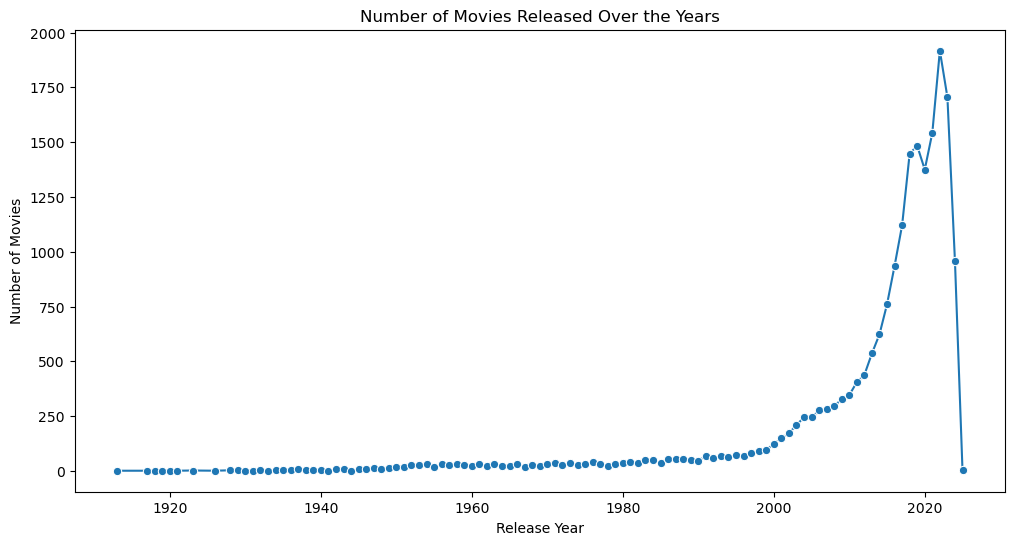

In [146]:
# Count of movies per release year
movies_per_year = df['Release_Year'].value_counts().sort_index()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()


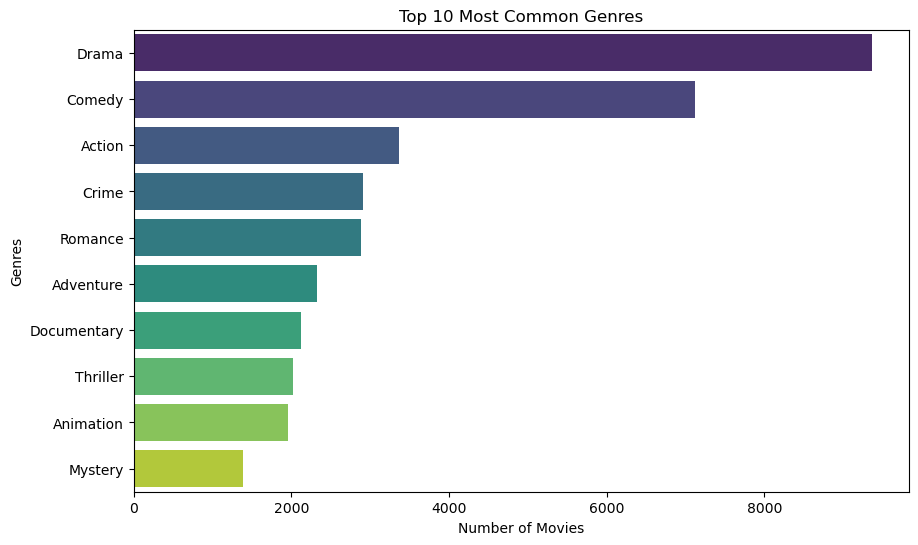

In [148]:
# Splitting 'genres' column and counting occurrences
all_genres = df['genres'].str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()


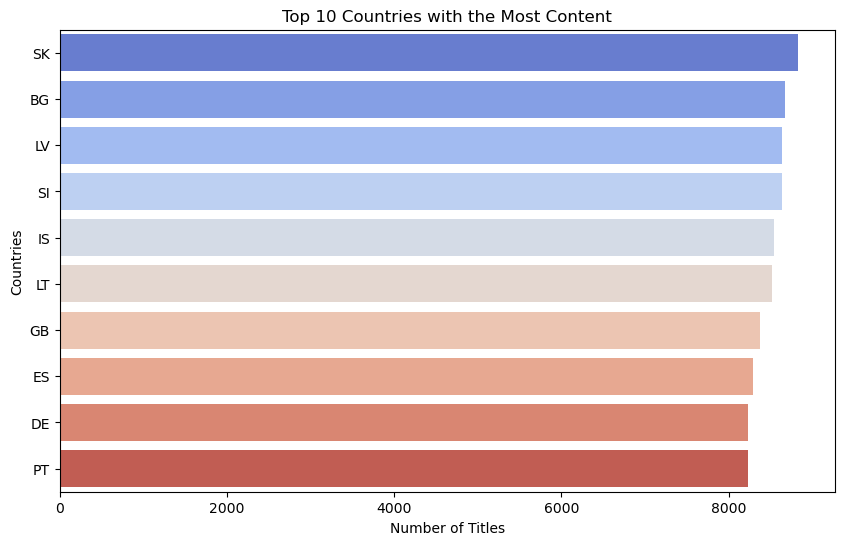

In [152]:
# Explode Available_Countries and count
all_countries = df['Available_Countries'].str.split(',').explode().str.strip()
top_10_countries = all_countries.value_counts().head(10)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='coolwarm')
plt.title('Top 10 Countries with the Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Countries')
plt.show()


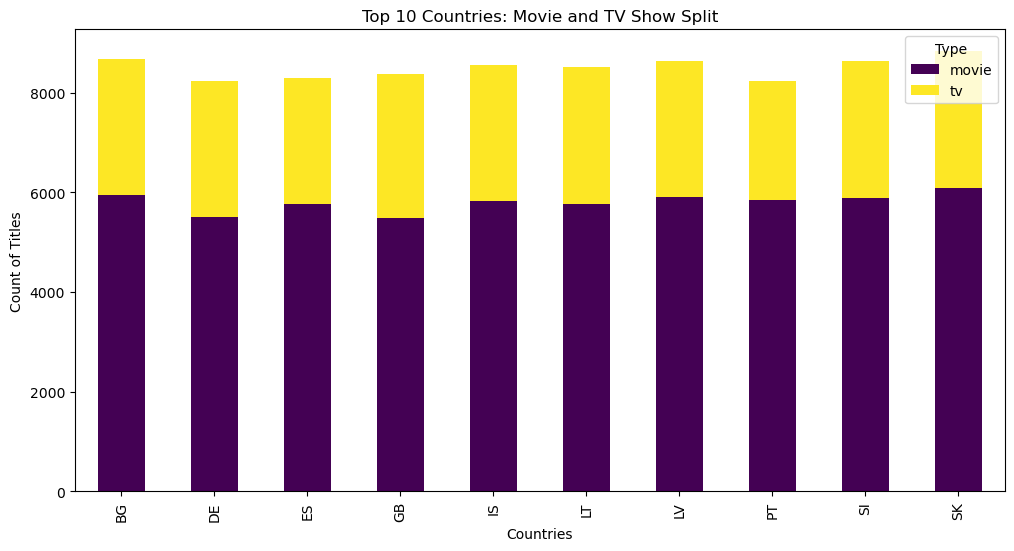

In [154]:
# Explode and filter top 10 countries
df_exploded = df.assign(Available_Countries=df['Available_Countries'].str.split(',')).explode('Available_Countries')
df_exploded['Available_Countries'] = df_exploded['Available_Countries'].str.strip()
top_countries = df_exploded['Available_Countries'].value_counts().head(10).index

# Filter top countries and group by Type
top_countries_data = df_exploded[df_exploded['Available_Countries'].isin(top_countries)]
country_type_split = top_countries_data.groupby(['Available_Countries', 'Type']).size().unstack(fill_value=0)

# Stacked bar chart
country_type_split.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Top 10 Countries: Movie and TV Show Split')
plt.ylabel('Count of Titles')
plt.xlabel('Countries')
plt.show()


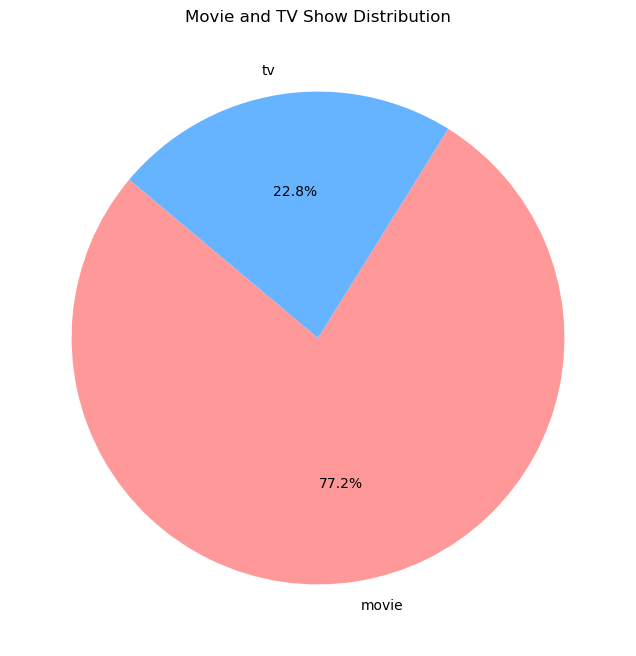

In [156]:
# Count distribution of types
type_counts = df['Type'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF'])
plt.title('Movie and TV Show Distribution')
plt.show()


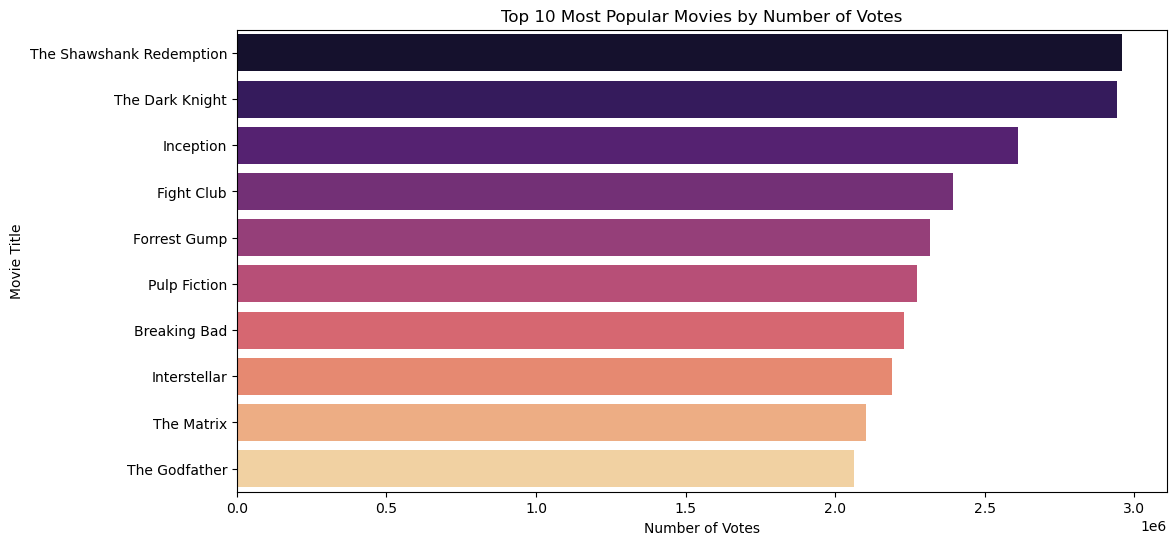

In [162]:
# Top 10 movies by IMDB_Num_Votes
top_movies = df.nlargest(10, 'IMDB_Num_Votes')

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='IMDB_Num_Votes', y='Title', data=top_movies, palette='magma')
plt.title('Top 10 Most Popular Movies by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.show()


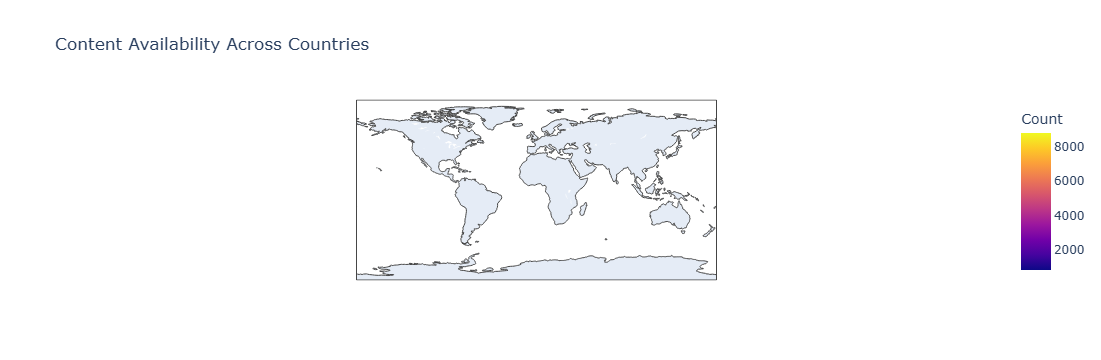

In [165]:
import plotly.express as px

# Explode countries for mapping
country_data = df['Available_Countries'].str.split(',').explode().str.strip().value_counts().reset_index()
country_data.columns = ['Country', 'Count']

# Map chart
fig = px.choropleth(country_data,
                    locations='Country',
                    locationmode='ISO-3',  # Requires ISO 3 codes for countries
                    color='Count',
                    title='Content Availability Across Countries',
                    color_continuous_scale='plasma')

fig.show()


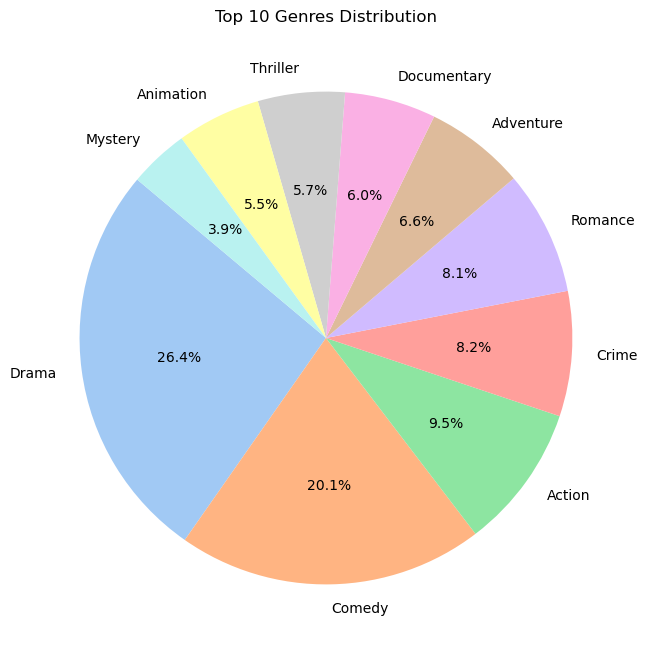

In [167]:
# Explode genres and count occurrences
all_genres = df['genres'].str.split(',').explode().str.strip()
genre_counts = all_genres.value_counts().head(10)  # Top 10 genres for clarity

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 Genres Distribution')
plt.show()


In [171]:
df.head()

,Title,Type,genres,Release_Year,IMDB_Average_Rating,IMDB_Num_Votes,Available_Countries,FirstGenre
0,Forrest Gump,movie,"Drama, Romance",1994,8.8,2316353.0,MX,Drama
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,517121.0,"AT, CH, DE",Action
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,1221791.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM...",Action
3,Jarhead,movie,"Biography, Drama, War",2005,7.0,211547.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH...",Biography
4,Unforgiven,movie,"Drama, Western",1992,8.2,443775.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...",Drama


In [177]:
df['Type']

0        movie
1        movie
2        movie
3        movie
4        movie
         ...  
20143       tv
20144       tv
20145       tv
20146       tv
20147       tv
Name: Type, Length: 20064, dtype: object

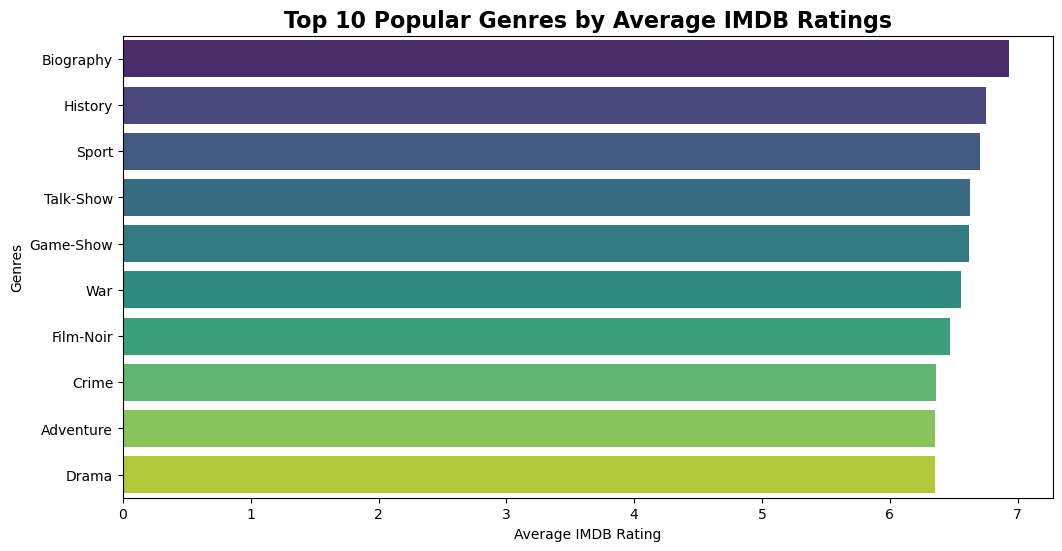

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode 'genres' column
df_exploded_genres = df.assign(genres=df['genres'].str.split(',')).explode('genres')
df_exploded_genres['genres'] = df_exploded_genres['genres'].str.strip()

# Calculate average ratings for each genre
top_genres_ratings = df_exploded_genres.groupby('genres')['IMDB_Average_Rating'].mean().sort_values(ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres_ratings.values, y=top_genres_ratings.index, palette='viridis')

# Add labels and title
plt.title('Top 10 Popular Genres by Average IMDB Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Average IMDB Rating')
plt.ylabel('Genres')

# Display the chart
plt.show()


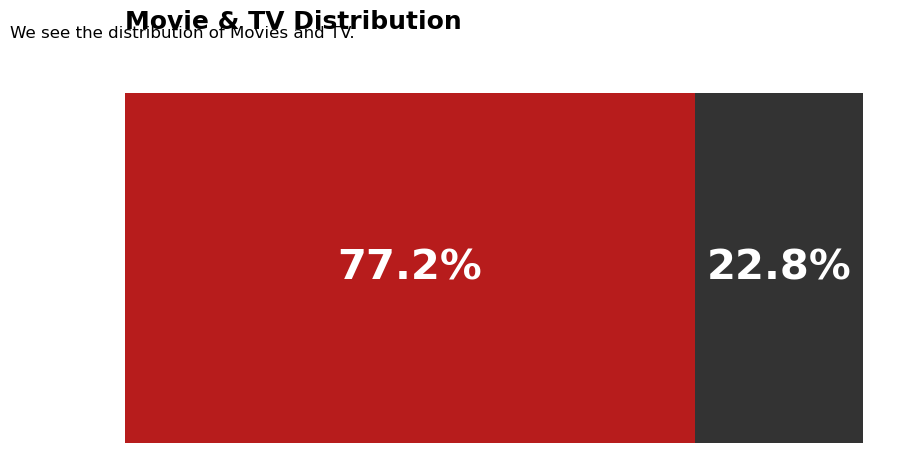

In [189]:
import matplotlib.pyplot as plt

# Convert 'Type' column to lowercase for consistency
df['Type'] = df['Type'].str.lower()

# Count occurrences of 'movie' and 'tv'
type_counts = df['Type'].value_counts()

# Extract percentages
movie_percentage = round((type_counts['movie'] / type_counts.sum()) * 100, 1)
tv_percentage = round((type_counts['tv'] / type_counts.sum()) * 100, 1)

# Data for the chart
labels = ['Movie', 'TV']
sizes = [movie_percentage, tv_percentage]
colors = ['#B71C1C', '#333333']  # Red for Movies, Dark gray for TV

# Create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot rectangles for proportions
ax.barh(y=[0], width=sizes[0], color=colors[0], height=0.5, label='Movie')
ax.barh(y=[0], width=sizes[1], left=sizes[0], color=colors[1], height=0.5, label='TV')

# Add percentages as text inside the bars
ax.text(s=f"{sizes[0]}%", x=sizes[0]/2, y=0, va='center', ha='center', fontsize=30, color='white', fontweight='bold')
ax.text(s=f"{sizes[1]}%", x=sizes[0] + sizes[1]/2, y=0, va='center', ha='center', fontsize=30, color='white', fontweight='bold')

# Remove axes for a clean look
ax.axis('off')

# Add the title
plt.title('Movie & TV Distribution', fontsize=18, fontweight='bold', loc='left', y=1.1)
plt.suptitle("We see the distribution of Movies and TV.", fontsize=12, x=0.01, ha='left')

# Display the plot
plt.show()
